# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [2]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

[ 0.5 -1.   1.  -1.   1.  -1.   1.  -1.   1.  -0.5]


---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [3]:
# ===== Twoja implementacja tutaj =====
f1 = lambda x : np.sign(x) * x + x**2
f2 = lambda x : np.sign(x) * x**2
f3 = lambda x : (np.abs(np.sign(5*x)))**3
f4a1 = lambda x : 1/(1+x**2)
f4a25 = lambda x : 1/(1+25*x**2)
f4a100 = lambda x : 1/(1+100*x**2)
f5 = lambda x : np.sign(x)


---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


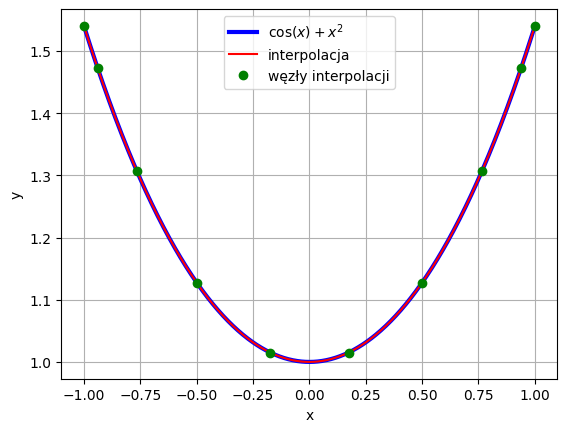

In [4]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)

# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

N          | Peak RAM [MiB] 
------------------------------
10         | 200.70         


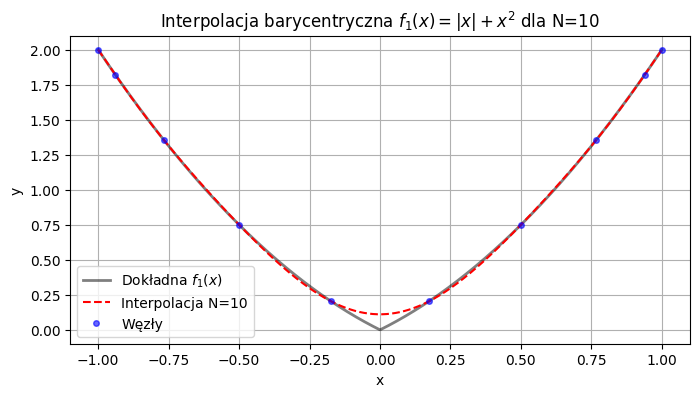

100        | 204.13         


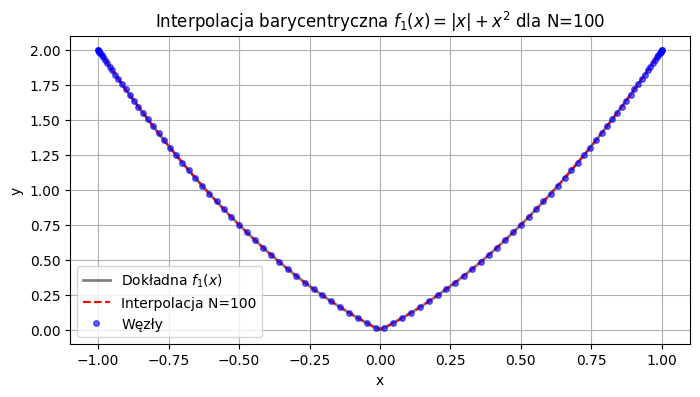

1000       | 231.87         


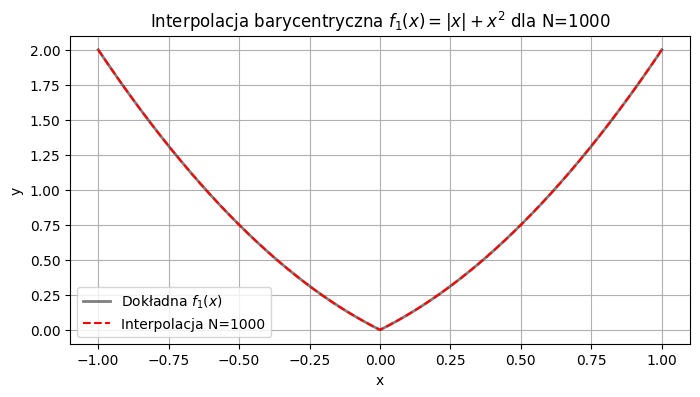

10000      | 372.08         
100000     | 2597.20        


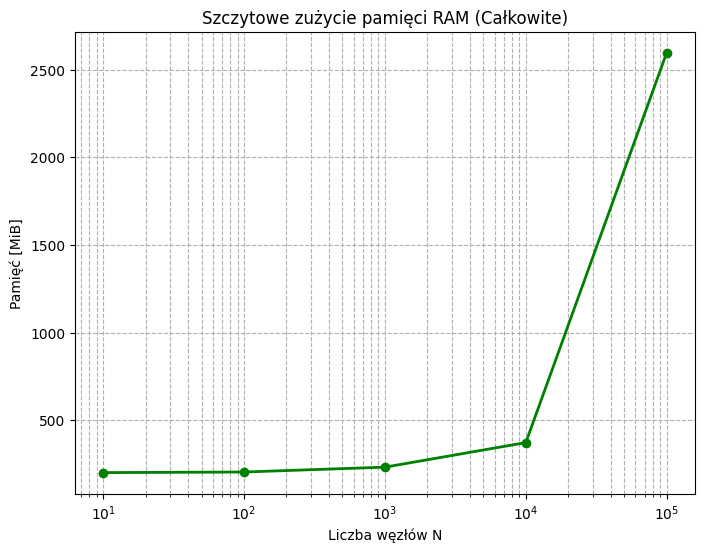

In [ ]:
# ===== Twoja implementacja tutaj =====
f1 = lambda x: np.sign(x) * x + x**2
ns_exponents = [1, 2, 3, 4, 5]
orders_N = [10**n for n in ns_exponents]
x_plot = np.linspace(-1, 1, 1000)
y_exact = f1(x_plot)
results_memory_peak = [] 
print(f"{'N':<10} | {'Peak RAM [MiB]':<15}")
print("-" * 30)

for N in orders_N:
        nodes = main.chebyshev_nodes(N)
        weights = main.bar_cheb_weights(N)
        y_nodes = f1(nodes)
        args = (nodes, y_nodes, weights, x_plot)

        mem_trace = memory_usage((main.barycentric_inte, args, {}), interval=0.05)

        peak_mem = max(mem_trace)
        results_memory_peak.append(peak_mem)

        print(f"{N:<10} | {peak_mem:<15.2f}")

        if N <= 1000:
            y_custom = main.barycentric_inte(nodes, y_nodes, weights, x_plot)

            plt.figure(figsize=(8, 4))
            plt.plot(x_plot, y_exact, 'k-', linewidth=2, alpha=0.5, label='Dokładna $f_1(x)$')
            plt.plot(x_plot, y_custom, 'r--', linewidth=1.5, label=f'Interpolacja N={N}')
            if N <= 100:
                plt.plot(nodes, y_nodes, 'bo', markersize=4, alpha=0.6, label='Węzły')

            plt.title(f'Interpolacja barycentryczna $f_1(x) = |x| + x^2$ dla N={N}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.legend()
            plt.grid(True)
            plt.show()
plt.figure(figsize=(8, 6))
plt.plot(orders_N, results_memory_peak, 'g-o', linewidth=2)
plt.xscale('log') 
plt.title('Szczytowe zużycie pamięci RAM (Całkowite)')
plt.xlabel('Liczba węzłów N')
plt.ylabel('Pamięć [MiB]')
plt.grid(True, which='both', linestyle='--')
plt.show()



    

---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definicje funkcji testowych (zgodnie z opisem rzędów różniczkowalności)
# f2 - jednokrotnie różniczkowalna (C1): sgn(x)*x^2 = x*|x|
f2 = lambda x: np.sign(x) * x**2

# f3 - trzykrotnie różniczkowalna (C3): |sin(5x)|^3
f3 = lambda x: (np.abs(np.sin(5*x)))**3

# Parametry ogólne
epsilon = np.finfo(np.float64).eps
print(f'Zero maszynowe wynosi: {epsilon}')

max_nodes_number = 100000
x = np.linspace(-1, 1, 1000)

# ==============================================================================
# ANALIZA DLA FUNKCJI JEDNOKROTNIE RÓŻNICZKOWALNEJ (f2)
# ==============================================================================
print('\n\nAnaliza funkcji jednokrotnie różniczkowalnej (f2)!!!!\n')

nodes_list_fun1 = [10]
fun1_norms = []
increase_list = True

while increase_list:
    nodes_number = nodes_list_fun1[-1]
    
    # Generowanie węzłów i wag
    cheb_nodes = chebyshev_nodes(nodes_number)
    cheb_weights = bar_cheb_weights(nodes_number)
    
    # Wyliczenie wartości w węzłach
    y_nodes = f2(cheb_nodes)
    
    # Interpolacja
    y_implemented = barycentric_inte(cheb_nodes, y_nodes, cheb_weights, x)
    
    # Obliczanie błędu (norma L_inf)
    # Pomijamy krańce [1:-2], aby uniknąć błędów numerycznych na brzegach przedziału przy bardzo gęstej siatce
    norm = L_inf(f2(x)[1:-2], y_implemented[1:-2])
    fun1_norms.append(norm)
    
    print(f'Dla {nodes_number} węzłów, błąd interpolacji wynosi: {norm:.5e}')

    # Wizualizacja (tylko dla małej liczby węzłów, żeby nie generować setek wykresów)
    if nodes_number <= 1000:
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(x, f2(x), 'b-', linewidth=2, alpha=0.6, label=r'$f_2(x) = \mathrm{sgn}(x)x^2$')
        ax.plot(x, y_implemented, 'r--', label='Interpolacja')
        
        if nodes_number < 150:
            ax.plot(cheb_nodes, y_nodes, 'go', markersize=4, label='Węzły')
            
        ax.set_title(f'Interpolacja f2 (C1), N={nodes_number}')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.grid(True)
        ax.legend()
        plt.show()

    # Warunek pętli: zwiększamy N 10-krotnie, dopóki błąd jest duży i nie przekroczyliśmy limitu
    if norm >= epsilon and (nodes_number * 10) <= max_nodes_number:
        nodes_list_fun1.append(nodes_number * 10)
    else:
        increase_list = False

# ==============================================================================
# ANALIZA DLA FUNKCJI TRZYKROTNIE RÓŻNICZKOWALNEJ (f3)
# ==============================================================================
print('\n\nAnaliza funkcji trzykrotnie różniczkowalnej (f3)!!!!\n')

nodes_list_fun2 = [10]
fun2_norms = []
increase_list = True

while increase_list:
    nodes_number = nodes_list_fun2[-1]
    
    cheb_nodes = chebyshev_nodes(nodes_number)
    cheb_weights = bar_cheb_weights(nodes_number) # Poprawiono literówkę "czeb" -> "cheb"
    
    y_nodes = f3(cheb_nodes)
    y_implemented = barycentric_inte(cheb_nodes, y_nodes, cheb_weights, x)
    
    norm = L_inf(f3(x)[1:-2], y_implemented[1:-2])
    fun2_norms.append(norm)
    
    print(f'Dla {nodes_number} węzłów, błąd interpolacji wynosi: {norm:.5e}')

    if nodes_number <= 1000:
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(x, f3(x), 'b-', linewidth=2, alpha=0.6, label=r'$f_3(x) = |\sin(5x)|^3$')
        ax.plot(x, y_implemented, 'r--', label='Interpolacja')
        
        if nodes_number < 150:
            ax.plot(cheb_nodes, y_nodes, 'go', markersize=4, label='Węzły')
            
        ax.set_title(f'Interpolacja f3 (C3), N={nodes_number}')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.grid(True)
        ax.legend()
        plt.show()

    if norm >= epsilon and (nodes_number * 10) <= max_nodes_number:
        nodes_list_fun2.append(nodes_number * 10)
    else:
        increase_list = False

# ==============================================================================
# WYKRES ZBIEŻNOŚCI (Log-Log)
# ==============================================================================

# Tworzenie teoretycznych rzędów zbieżności do porównania
n_pow_v_1 = [n ** -1.0 for n in nodes_list_fun1] # Dla funkcji C1 oczekujemy O(n^-1)
n_pow_v_3 = [n ** -3.0 for n in nodes_list_fun2] # Dla funkcji C3 oczekujemy O(n^-3)

fig, ax = plt.subplots(figsize=(10, 8))

# Wyniki eksperymentu
ax.loglog(nodes_list_fun1, fun1_norms, 'bo-', label=r'F. $C^1$: $f(x) = \mathrm{sgn}(x)x^{2}$')
ax.loglog(nodes_list_fun2, fun2_norms, 'ro-', label=r'F. $C^3$: $f(x)=|\sin(5 x)|^3$')

# Linie teoretyczne (odniesienia)
# Przesuwamy je nieco w dół/górę (mnożąc przez stałą), żeby nie nachodziły na dane, ale pokazywały nachylenie
ax.loglog(nodes_list_fun1, n_pow_v_1, 'b:', linewidth=2, alpha=0.7, label=r'Teoria $O(n^{-1})$')
ax.loglog(nodes_list_fun2, n_pow_v_3, 'r:', linewidth=2, alpha=0.7, label=r'Teoria $O(n^{-3})$')

ax.set_title('Rząd zbieżności interpolacji w zależności od gładkości funkcji', fontsize=14)
ax.set_xlabel('Liczba węzłów (n)', fontsize=12)
ax.set_ylabel('Norma błędu interpolacji ($L_{\infty}$)', fontsize=12)
ax.grid(True, which="both", ls="-", alpha=0.4)
ax.legend(fontsize=12)

plt.show()

Zero maszynowe wynosi: 2.220446049250313e-16


Analiza funkcji jednokrotnie różniczkowalnej (f2)!!!!



<>:133: SyntaxWarning: invalid escape sequence '\i'
<>:133: SyntaxWarning: invalid escape sequence '\i'
C:\Users\pawel\AppData\Local\Temp\ipykernel_21444\3560570692.py:133: SyntaxWarning: invalid escape sequence '\i'
  ax.set_ylabel('Norma błędu interpolacji ($L_{\infty}$)', fontsize=12)
C:\Users\pawel\AppData\Local\Temp\ipykernel_21444\3560570692.py:133: SyntaxWarning: invalid escape sequence '\i'
  ax.set_ylabel('Norma błędu interpolacji ($L_{\infty}$)', fontsize=12)


NameError: name 'chebyshev_nodes' is not defined

---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

In [ ]:
# ===== Twoja implementacja tutaj =====


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)